In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Общая информация

In [277]:
df = pd.read_excel('Данные_для_курсовои_Классическое_МО.xlsx')
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [278]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


Датасет состоит из 1001 записи, содержащей 214 признаков. Вот некоторые из них:

**IC50, mM** — концентрация вещества, при которой наблюдается 50% ингибирование активности (мера эффективности лекарства), в миллимолях.

**CC50, mM** — концентрация, вызывающая гибель 50% клеток (мера токсичности), в миллимолях.

**SI** — селективный индекс (SI = CC50 / IC50), отражает терапевтическое окно.

**qed** — Quantitative Estimate of Drug-likeness — количественная оценка "лекарственности" молекулы.

**MaxAbsEStateIndex** — максимальное абсолютное значение EState-индикатора для атомов.

**MaxEStateIndex** — максимальное значение EState-индикатора.

**MinAbsEStateIndex** — минимальное абсолютное значение EState-индикатора.

**MinEStateIndex** — минимальное значение EState-индикатора.

**SPS** — Surface Polar Score — мера полярности молекулярной поверхности (иногда в смысле структурной сложности).

**fr_sulfide** — содержит сульфидную группу (–S–).

**fr_sulfonamd** — содержит сульфонамидную группу (–SO₂–NH₂).

**fr_sulfone** — содержит сульфон (–SO₂–).

**fr_term_acetylene** — содержит терминальный ацетилен (концевая ≡C–H группа).

**fr_tetrazole** — содержит тетразольное кольцо.

**fr_thiazole** — содержит тиазольное кольцо.

**fr_thiocyan** — содержит тиоцианат (–SCN).

**fr_thiophene** — содержит тиофен.

**fr_unbrch_alkane** — содержит неразветвлённую алкановую цепь.

**fr_urea** — содержит мочевину (–NH–CO–NH–).


Перед нами стоит несколько задач:
1. Научиться считать регрессию для IC50, CC50 и SI
2. Научиться классифицировать по признаку превышения медианного значения дл IC50, CC50 и SI
3. Научиться классифицировать по признаку SI > 8

Сответсвенно разделим наш EDA на 3 части - отдельно для IC50, CC50 и SI

Но первым шагом посчитаем медианные значения.

In [279]:
medians_map = {}

for i in ['IC50, mM', 'CC50, mM', 'SI']:
  medians_map[i] = df[i].median()

medians_map

{'IC50, mM': 46.58518345980803,
 'CC50, mM': 411.0393423370522,
 'SI': 3.846153846153846}

In [280]:
nan_counts = df.isnull().sum()
nan_counts[nan_counts > 0]

,0
MaxPartialCharge,3
MinPartialCharge,3
MaxAbsPartialCharge,3
MinAbsPartialCharge,3
BCUT2D_MWHI,3
BCUT2D_MWLOW,3
BCUT2D_CHGHI,3
BCUT2D_CHGLO,3
BCUT2D_LOGPHI,3
BCUT2D_LOGPLOW,3


Наш датасет содержит пропуски в ряде колонок

'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW'

Вцелом, данные пропуски соответсвуют 3 записям в нашем основном датасете, т.ч. можем спокойно удалить их, т.к, это всего лишь 0,3% от имеющихся данных. также удалим первую колонку, т.к. она не несет смысловой нагрузки.

In [281]:
df.dropna(inplace=True)
df.info()
df.drop(['Unnamed: 0'], axis=1, inplace=True)
nan_counts = df.isnull().sum()
nan_counts[nan_counts > 0]

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


,0


# Анализ IC50

In [282]:
target_column = 'IC50, mM'
df[target_column].describe()

,"IC50, mM"
count,998.000000
mean,221.118757
std,400.510657
min,0.003517
25%,12.491340
50%,45.992006
75%,224.408630
max,4128.529377


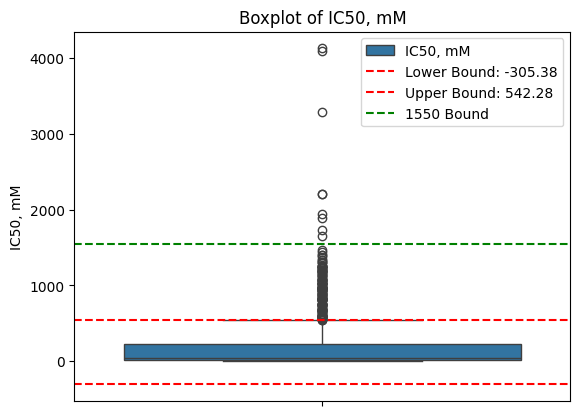

In [283]:
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sns.boxplot(df[target_column], label=target_column)

plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axhline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.axhline(1550, color='green', linestyle='--', label=f'1550 Bound')

plt.title(f'Boxplot of {target_column}')
plt.legend()

plt.show()

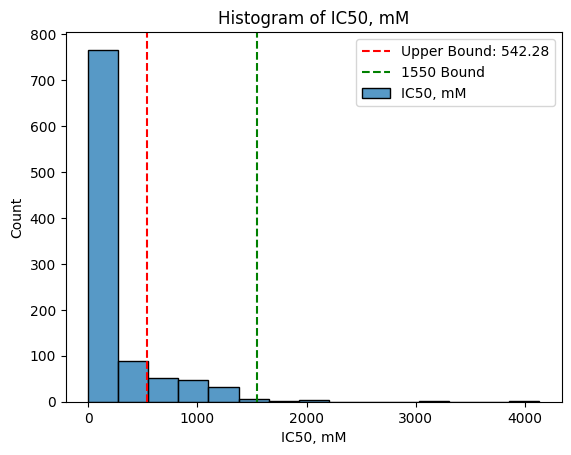

In [284]:
sns.histplot(df[target_column], label=target_column, bins= 15)

plt.title(f'Histogram of {target_column}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.axvline(1550, color='green', linestyle='--', label=f'1550 Bound')
plt.legend()

In [285]:
count_higher_than_upper_bound = df[df[target_column]>upper_bound].shape[0]
count_etxtreem = df[df[target_column]>1550].shape[0]

print(f"Количество значений выше верхней границы: {count_higher_than_upper_bound}. %: {count_higher_than_upper_bound/df.shape[0]*100}")
print(f"Количество значений выше 1550: {count_etxtreem}. %: {count_etxtreem/df.shape[0]*100}")

Количество значений выше верхней границы: 145. %: 14.529058116232466
Количество значений выше 1550: 9. %: 0.9018036072144289


На представленных графиках видно, что значения IC50 имеют выбросы. Стандартными выбросами можно считать значения выше 542.28 и таких в датасете 145 записей. Экстриальными выбросами можно считать значения выше 1550 (примечание - значение подобранно визуально исходя из графика boxplot). Таких записей всего 9. На данном этапе очистим наш датасет от экстримальных выбросов.

In [286]:
df_ic50 = df_ic50[df_ic50[target_column]<=1550]

def corr_analyz(dataf, target_column, corr_treshold=0.2):
  corr_map = {}
  print('порог: ', corr_treshold)
  correlations = dataf.corr()[target_column]
  for i in correlations.index:
    if i != target_column and abs(correlations[i])>= corr_treshold:
      corr_map[i] = correlations[i]
      print(f"Коэффициент корреляции между {target_column} и {i}: {correlations[i]}")

  return corr_map

corr_map = corr_analyz(df, target_column, 0.2)


порог:  0.2
Коэффициент корреляции между IC50, mM и CC50, mM: 0.5225339077391492
Коэффициент корреляции между IC50, mM и FpDensityMorgan1: 0.20446180336982234
Коэффициент корреляции между IC50, mM и BCUT2D_CHGLO: 0.20459673941022227
Коэффициент корреляции между IC50, mM и BCUT2D_LOGPHI: -0.21142437805985437
Коэффициент корреляции между IC50, mM и Chi0n: -0.2123607779650124
Коэффициент корреляции между IC50, mM и Chi0v: -0.21104513503475839
Коэффициент корреляции между IC50, mM и Chi1n: -0.22575598946267028
Коэффициент корреляции между IC50, mM и Chi1v: -0.21791690840125075
Коэффициент корреляции между IC50, mM и Chi2n: -0.2527050819024017
Коэффициент корреляции между IC50, mM и Chi2v: -0.24660195947723743
Коэффициент корреляции между IC50, mM и Chi3n: -0.2354913862328996
Коэффициент корреляции между IC50, mM и Chi3v: -0.23481558128060948
Коэффициент корреляции между IC50, mM и Chi4n: -0.2392091381192484
Коэффициент корреляции между IC50, mM и Chi4v: -0.24048483406030996
Коэффициент кор

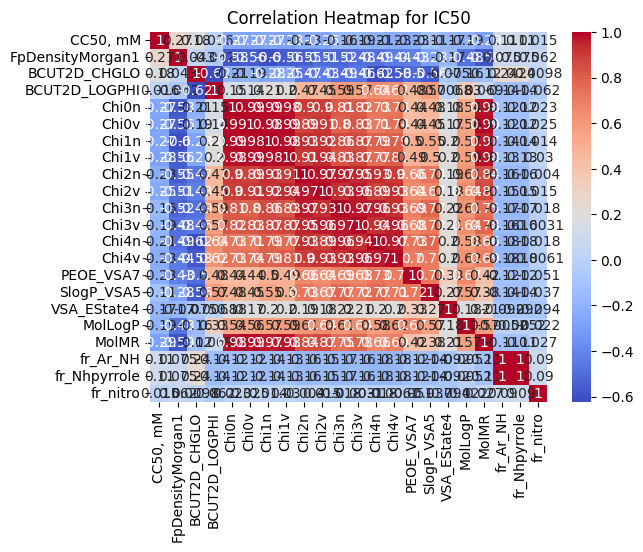

In [287]:
df_ic50_corr = df_ic50[list(columns_with_correlation.keys())]

sns.heatmap(df_ic50_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for IC50')
plt.show()

In [288]:
df_ic50_corr.corr()

,"CC50, mM",FpDensityMorgan1,BCUT2D_CHGLO,BCUT2D_LOGPHI,Chi0n,Chi0v,Chi1n,Chi1v,Chi2n,Chi2v,...,Chi4n,Chi4v,PEOE_VSA7,SlogP_VSA5,VSA_EState4,MolLogP,MolMR,fr_Ar_NH,fr_Nhpyrrole,fr_nitro
"CC50, mM",1.000000,0.267577,0.179759,0.015542,-0.266584,-0.274977,-0.267049,-0.280341,-0.226808,-0.249410,...,-0.206214,-0.231133,-0.227244,-0.114091,-0.172410,-0.194214,-0.285658,0.109095,0.109095,0.015069
FpDensityMorgan1,0.267577,1.000000,0.042784,-0.062218,-0.582514,-0.557002,-0.603673,-0.563980,-0.553113,-0.506772,...,-0.486097,-0.443162,-0.434396,-0.282770,-0.173433,-0.477815,-0.585976,0.074595,0.074595,0.061502
BCUT2D_CHGLO,0.179759,0.042784,1.000000,-0.621999,-0.206505,-0.189785,-0.277350,-0.250067,-0.467954,-0.430402,...,-0.620708,-0.577256,-0.496906,-0.559505,-0.075016,-0.162025,-0.123077,0.244869,0.244869,0.009816
BCUT2D_LOGPHI,0.015542,-0.062218,-0.621999,1.000000,0.148629,0.141953,0.211784,0.200617,0.467127,0.445703,...,0.644149,0.622411,0.478305,0.571530,0.006755,0.329233,0.068807,-0.138173,-0.138173,-0.061943
Chi0n,-0.266584,-0.582514,-0.206505,0.148629,1.000000,0.993051,0.989424,0.978218,0.900443,0.895232,...,0.726033,0.732549,0.439512,0.479950,0.175596,0.536615,0.980183,-0.124136,-0.124136,0.022775
Chi0v,-0.274977,-0.557002,-0.189785,0.141953,0.993051,1.000000,0.981237,0.988617,0.885088,0.905081,...,0.710924,0.742931,0.436789,0.450973,0.172771,0.555538,0.988856,-0.119291,-0.119291,0.025270
Chi1n,-0.267049,-0.603673,-0.277350,0.211784,0.989424,0.981237,1.000000,0.984581,0.934349,0.923291,...,0.792463,0.793105,0.503437,0.546042,0.202841,0.565756,0.968273,-0.143597,-0.143597,0.014027
Chi1v,-0.280341,-0.563980,-0.250067,0.200617,0.978218,0.988617,0.984581,1.000000,0.909329,0.939841,...,0.765019,0.806996,0.491145,0.502670,0.195425,0.588076,0.976382,-0.127457,-0.127457,0.029524
Chi2n,-0.226808,-0.553113,-0.467954,0.467127,0.900443,0.885088,0.934349,0.909329,1.000000,0.970951,...,0.926870,0.902603,0.659455,0.727304,0.190318,0.608802,0.844797,-0.163756,-0.163756,-0.004019
Chi2v,-0.249410,-0.506772,-0.430402,0.445703,0.895232,0.905081,0.923291,0.939841,0.970951,1.000000,...,0.891079,0.925375,0.642673,0.669555,0.182321,0.641715,0.866310,-0.147471,-0.147471,0.014693


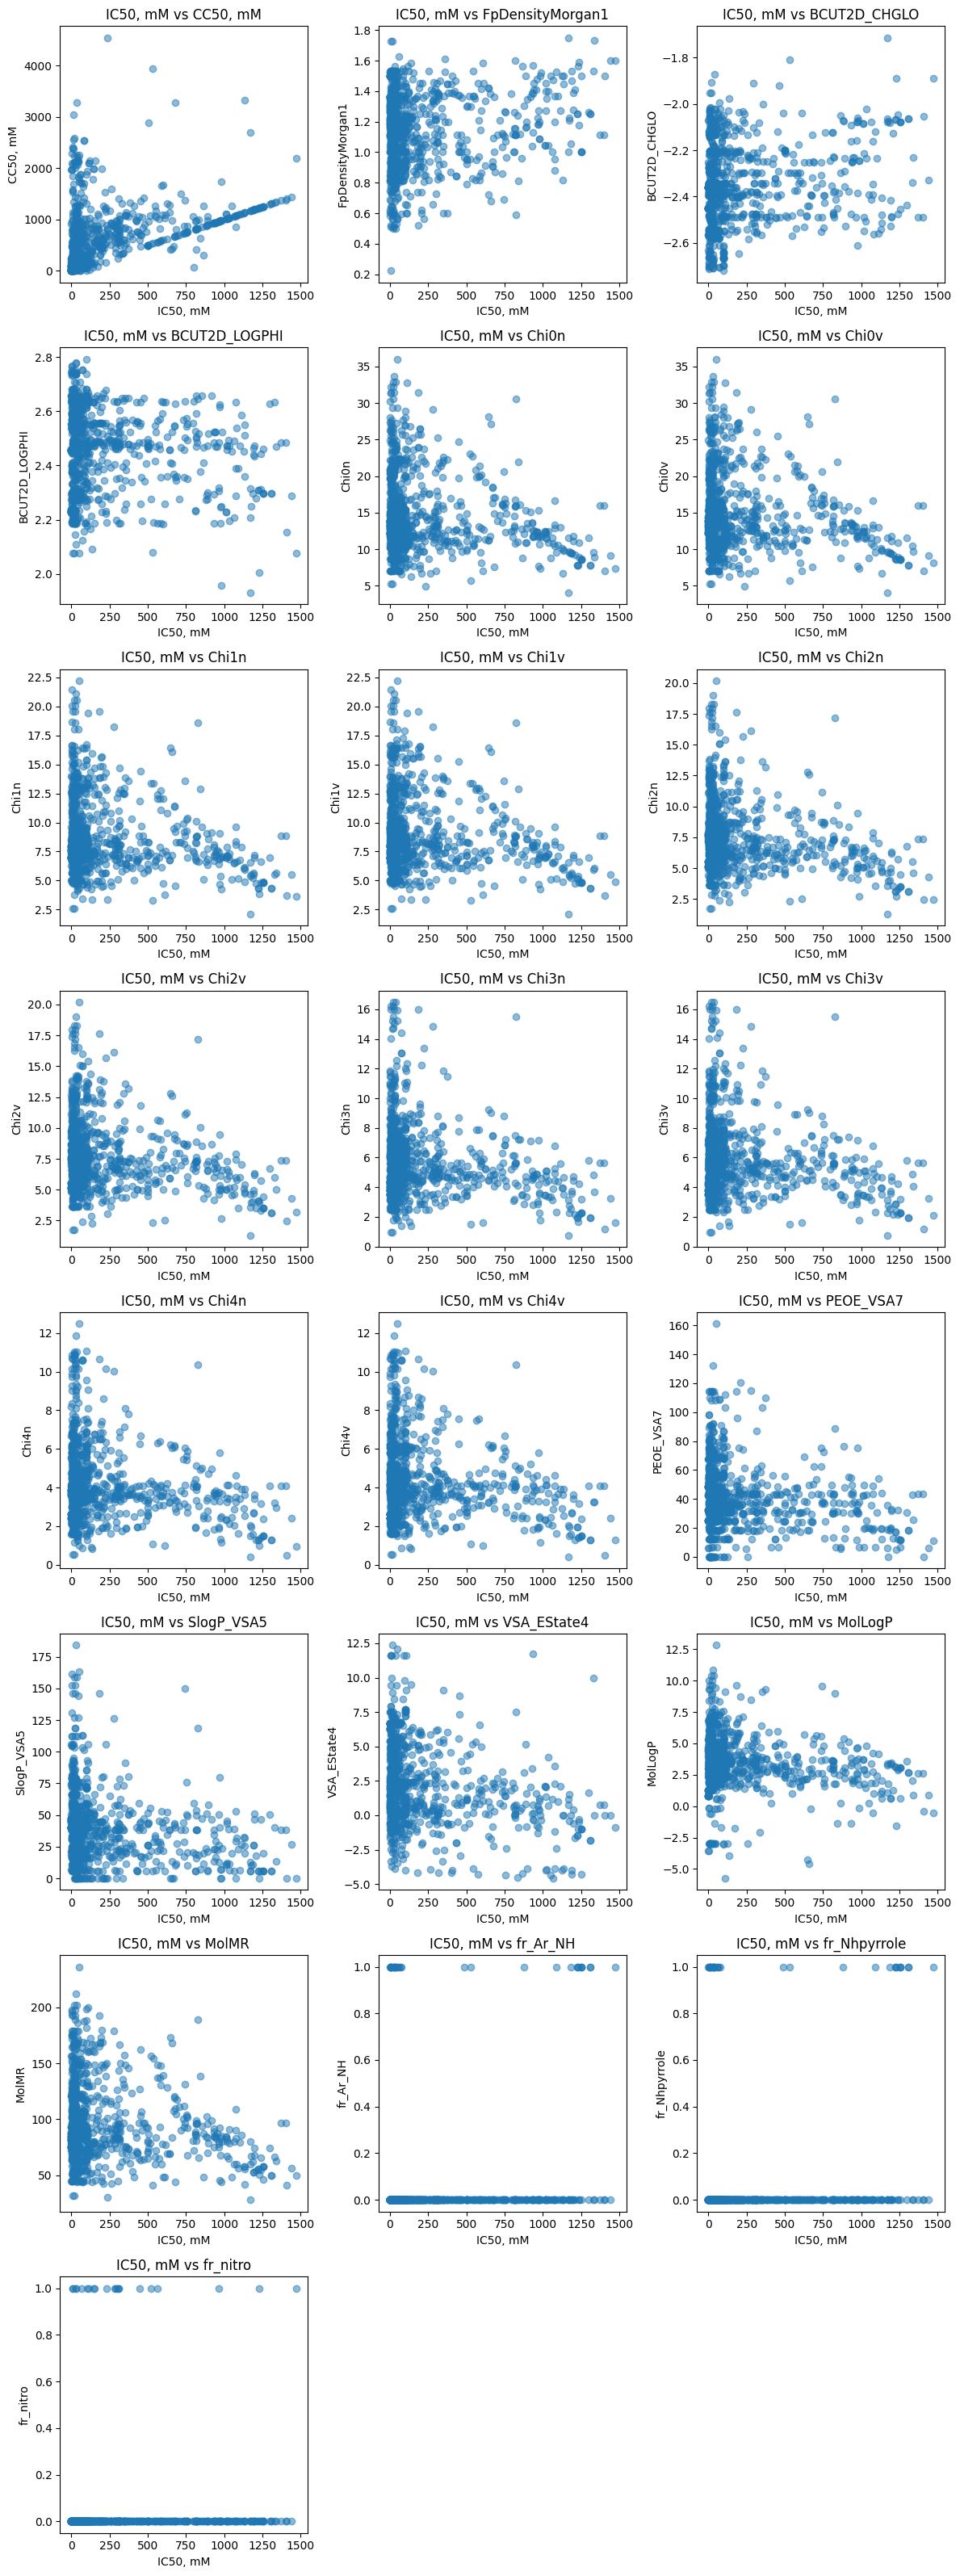

In [289]:
def draw_scatterplots_for_correlations(dataf, target_column, corr_map):
  x_size = 3
  y_size = (len(corr_map.keys()) + x_size - 1) // x_size

  fig, axes = plt.subplots(y_size, x_size, figsize=(12, y_size * 4))
  axes = axes.flatten()

  cols_to_plot = list(corr_map.keys())

  for i, col in enumerate(cols_to_plot):
    axes[i].scatter(dataf[target_column], dataf[col], alpha=0.5)
    axes[i].set_title(f'{target_column} vs {col}')
    axes[i].set_xlabel(target_column)
    axes[i].set_ylabel(col)

  for j in range(len(cols_to_plot), len(axes)):
      fig.delaxes(axes[j])


  plt.tight_layout()
  plt.show()

draw_scatterplots_for_correlations(df_ic50, target_column, corr_map)

Проведя корреляционный анализ мы видим, что наш признак в основном коррелирует с такими признаками (в основном уровень корреляции низкий):

*Цитотоксичность*

**CC50, mM**

Цитотоксическая концентрация - концентрация, при которой погибает 50% клеток
Мера общей токсичности соединения


---



*Электронные дескрипторы*

**MinEStateIndex**

Минимальное значение электронного состояния среди всех атомов в молекуле
Характеризует наиболее электронодефицитный атом
Указывает на:
Потенциальные электрофильные центры
Склонность к нуклеофильной атаке
Реакционную способность молекулы


---


*Молекулярные дескрипторы связности (Connectivity Chi indices)*

Эти дескрипторы основаны на топологии молекулярного графа и характеризуют форму и разветвленность молекулы.

Chi индексы 2-го порядка:

**Chi2n** - Simple connectivity index порядка 2

Описывает локальную связность через 2 связи
Характеризует короткие разветвления в структуре

**Chi2v** - Valence connectivity index порядка 2

Взвешенный по валентности вариант Chi2n
Учитывает электронные свойства атомов
Более чувствителен к гетероатомам

Chi индексы 3-го порядка:

**Chi3n** - Simple connectivity index порядка 3

Описывает средние структурные мотивы (через 3 связи)
Характеризует степень разветвления

**Chi3v** - Valence connectivity index порядка 3

Валентно-взвешенный вариант Chi3n
Отражает электронное окружение в средних фрагментах

Chi индексы 4-го порядка:

**Chi4n** - Simple connectivity index порядка 4

Описывает крупные структурные паттерны
Характеризует общую архитектуру молекулы

**Chi4v** - Valence connectivity index порядка 4

Валентно-взвешенный вариант Chi4n
Отражает дальнодействующие электронные эффекты

Биологическое значение Chi-индексов:
Связь с биологической активностью:

---

*VSA-дескрипторы (Van der Waals Surface Area)*

**PEOE_VSA7**

Площадь поверхности атомов с парциальными зарядами в определенном диапазоне (по методу PEOE - Partial Equalization of Orbital Electronegativity)
Характеризует электростатические свойства молекулы
Влияет на взаимодействие с биологическими мишенями

**SMR_VSA4**

Площадь поверхности, взвешенная по молекулярной рефракции (SMR - Molar Refractivity)
Отражает поляризуемость и объемные свойства молекулы
Связана со способностью к π-π взаимодействиям

**SlogP_VSA5**

Площадь поверхности, взвешенная по липофильности (SlogP)
Характеризует гидрофобные области молекулы
Критична для проницаемости через мембраны и связывания с белками

**EState_VSA8**

Площадь поверхности, взвешенная по электронному состоянию атомов (EState)
Комбинирует электронные и топологические свойства
Важна для реакционной способности

**VSA_EState4, VSA_EState7**

Площади поверхности атомов в разных диапазонах электронных состояний
Описывают электронное распределение в молекуле
Влияют на селективность связывания

---

*Структурные дескрипторы*

**NumAliphaticCarbocycles**

Количество алифатических карбоциклов (насыщенные кольца из углерода)
Влияет на конформационную жесткость и липофильность
Важно для связывания в гидрофобных карманах белков

**NumSaturatedCarbocycles**

Количество насыщенных углеродных циклов
Характеризует структурную жесткость молекулы
Влияет на энтропийные факторы связывания

**NumSaturatedHeterocycles**

Количество насыщенных гетероциклов (кольца с N, O, S)
Обеспечивает водородные связи и полярные взаимодействия
Критично для специфичности к биологическим мишеням

---

*Функциональные группы*

**fr_alkyl_halide**

Количество алкилгалогенидных фрагментов (R-X, где X = F, Cl, Br, I)
Влияет на реакционную способность и метаболизм
Может образовывать ковалентные связи с белками
Важно для фармакокинетики (часто метаболически лабильны)

Ественно внутри этих групп мы видим взаимную корреляцию на достаточно высоком уровне также мы можем наблюдать, что MinEStateIndex сильно коррелирует с fr_alkyl_halide, что говорит нам о том, что именно алкилгалогениднеы фрагменты имеют минимальное электронного состояния

# Анализ CC50

In [290]:
target_column = 'CC50, mM'
df[target_column].describe()

,"CC50, mM"
count,998.000000
mean,586.668414
std,642.016454
min,0.700808
25%,99.999036
50%,408.793314
75%,891.770961
max,4538.976189


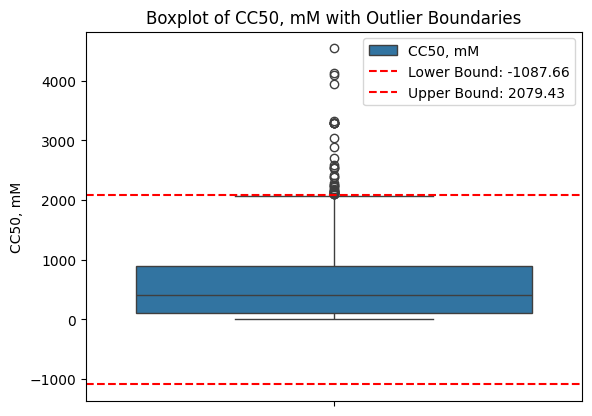

In [291]:
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sns.boxplot(df[target_column], label=target_column)

plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axhline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

plt.title(f'Boxplot of {target_column} with Outlier Boundaries')
plt.legend()

plt.show()

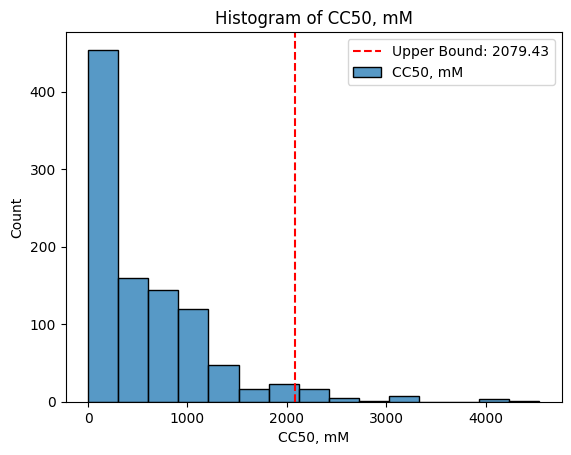

In [292]:
sns.histplot(df[target_column], label=target_column, bins= 15)

plt.title(f'Histogram of {target_column}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.legend()

In [293]:
count_higher_than_upper_bound = df[df[target_column]>upper_bound].shape[0]
print(f"Количество значений выше верхней границы: {count_higher_than_upper_bound}. %: {count_higher_than_upper_bound/df.shape[0]*100}")

Количество значений выше верхней границы: 39. %: 3.9078156312625247


На представленных графиках видно, что значения CC50 имеют выбросы. Выбросами можно считать значения выше 2079.43 Таких записей всего 39.

порог:  0.2
Коэффициент корреляции между CC50, mM и IC50, mM: 0.5367943974031575
Коэффициент корреляции между CC50, mM и MolWt: -0.21855071124931288
Коэффициент корреляции между CC50, mM и HeavyAtomMolWt: -0.21521140024968588
Коэффициент корреляции между CC50, mM и ExactMolWt: -0.21849529656966296
Коэффициент корреляции между CC50, mM и NumValenceElectrons: -0.2155775634604847
Коэффициент корреляции между CC50, mM и FpDensityMorgan1: 0.23836064418121145
Коэффициент корреляции между CC50, mM и FpDensityMorgan2: 0.2208146507926615
Коэффициент корреляции между CC50, mM и Chi0: -0.22029051602747862
Коэффициент корреляции между CC50, mM и Chi0n: -0.21124718131080764
Коэффициент корреляции между CC50, mM и Chi0v: -0.21638078859389
Коэффициент корреляции между CC50, mM и Chi1: -0.21799335140408332
Коэффициент корреляции между CC50, mM и Chi1n: -0.21361354601157156
Коэффициент корреляции между CC50, mM и Chi1v: -0.22300164646361126
Коэффициент корреляции между CC50, mM и Chi2v: -0.207878836451

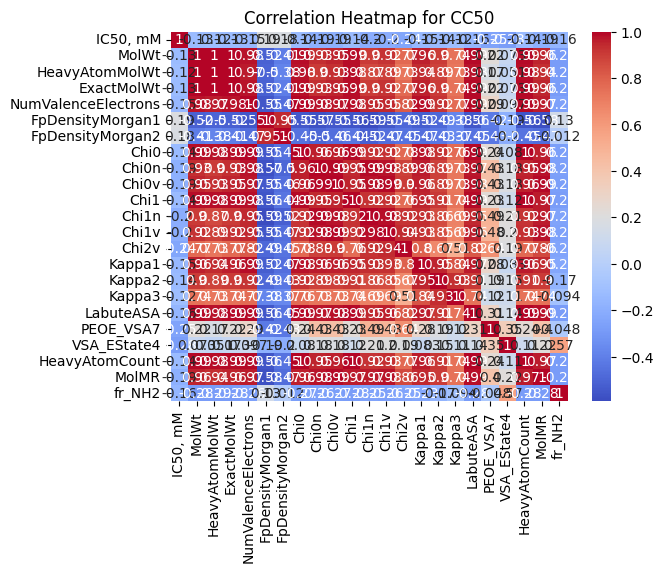

In [294]:
df_cc50 = df[df[target_column]<=upper_bound]
cc50_corr_map = corr_analyz(df_cc50, target_column, 0.2)
df_cc50_corr = df_cc50[list(cc50_corr_map.keys())]

sns.heatmap(df_cc50_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for CC50')
plt.show()

In [295]:
df_cc50_corr.corr()

,"IC50, mM",MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,FpDensityMorgan2,Chi0,Chi0n,Chi0v,...,Chi2v,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA7,VSA_EState4,HeavyAtomCount,MolMR,fr_NH2
"IC50, mM",1.000000,-0.132369,-0.116703,-0.132256,-0.145815,0.185068,0.178228,-0.137279,-0.189647,-0.190855,...,-0.241383,-0.148561,-0.137481,-0.115277,-0.159205,-0.251019,-0.279016,-0.137286,-0.190526,-0.159827
MolWt,-0.132369,1.000000,0.996789,0.999998,0.980603,-0.515709,-0.407995,0.986143,0.933322,0.952170,...,0.772551,0.958235,0.903475,0.743468,0.988009,0.224561,0.073153,0.988906,0.955402,-0.282624
HeavyAtomMolWt,-0.116703,0.996789,1.000000,0.996757,0.965283,-0.499799,-0.383303,0.977318,0.903744,0.926323,...,0.728236,0.938566,0.887790,0.728049,0.975929,0.172215,0.051392,0.982305,0.935000,-0.286679
ExactMolWt,-0.132256,0.999998,0.996757,1.000000,0.980828,-0.516002,-0.408373,0.986357,0.933555,0.952242,...,0.772530,0.958477,0.903678,0.743665,0.988092,0.224434,0.073065,0.989077,0.955450,-0.282521
NumValenceElectrons,-0.145815,0.980603,0.965283,0.980828,1.000000,-0.551884,-0.466498,0.994639,0.975119,0.974015,...,0.816417,0.986023,0.924604,0.767977,0.990286,0.285076,0.097312,0.990314,0.966873,-0.260705
FpDensityMorgan1,0.185068,-0.515709,-0.499799,-0.516002,-0.551884,1.000000,0.946438,-0.548722,-0.572582,-0.545661,...,-0.493092,-0.524812,-0.491520,-0.380835,-0.555019,-0.421521,-0.188934,-0.559891,-0.575403,0.131150
FpDensityMorgan2,0.178228,-0.407995,-0.383303,-0.408373,-0.466498,0.946438,1.000000,-0.453987,-0.498714,-0.462589,...,-0.447568,-0.466322,-0.432268,-0.367301,-0.448158,-0.430876,-0.204006,-0.449236,-0.471978,-0.012189
Chi0,-0.137279,0.986143,0.977318,0.986357,0.994639,-0.548722,-0.453987,1.000000,0.958049,0.958716,...,0.775080,0.979267,0.919735,0.763956,0.989108,0.238934,0.079505,0.995774,0.959123,-0.269983
Chi0n,-0.189647,0.933322,0.903744,0.933555,0.975119,-0.572582,-0.498714,0.958049,1.000000,0.992820,...,0.893042,0.964646,0.893554,0.731652,0.971229,0.429894,0.182446,0.954109,0.979650,-0.264513
Chi0v,-0.190855,0.952170,0.926323,0.952242,0.974015,-0.545661,-0.462589,0.958716,0.992820,1.000000,...,0.903468,0.961583,0.891186,0.727826,0.980395,0.426926,0.180036,0.958087,0.988544,-0.274898


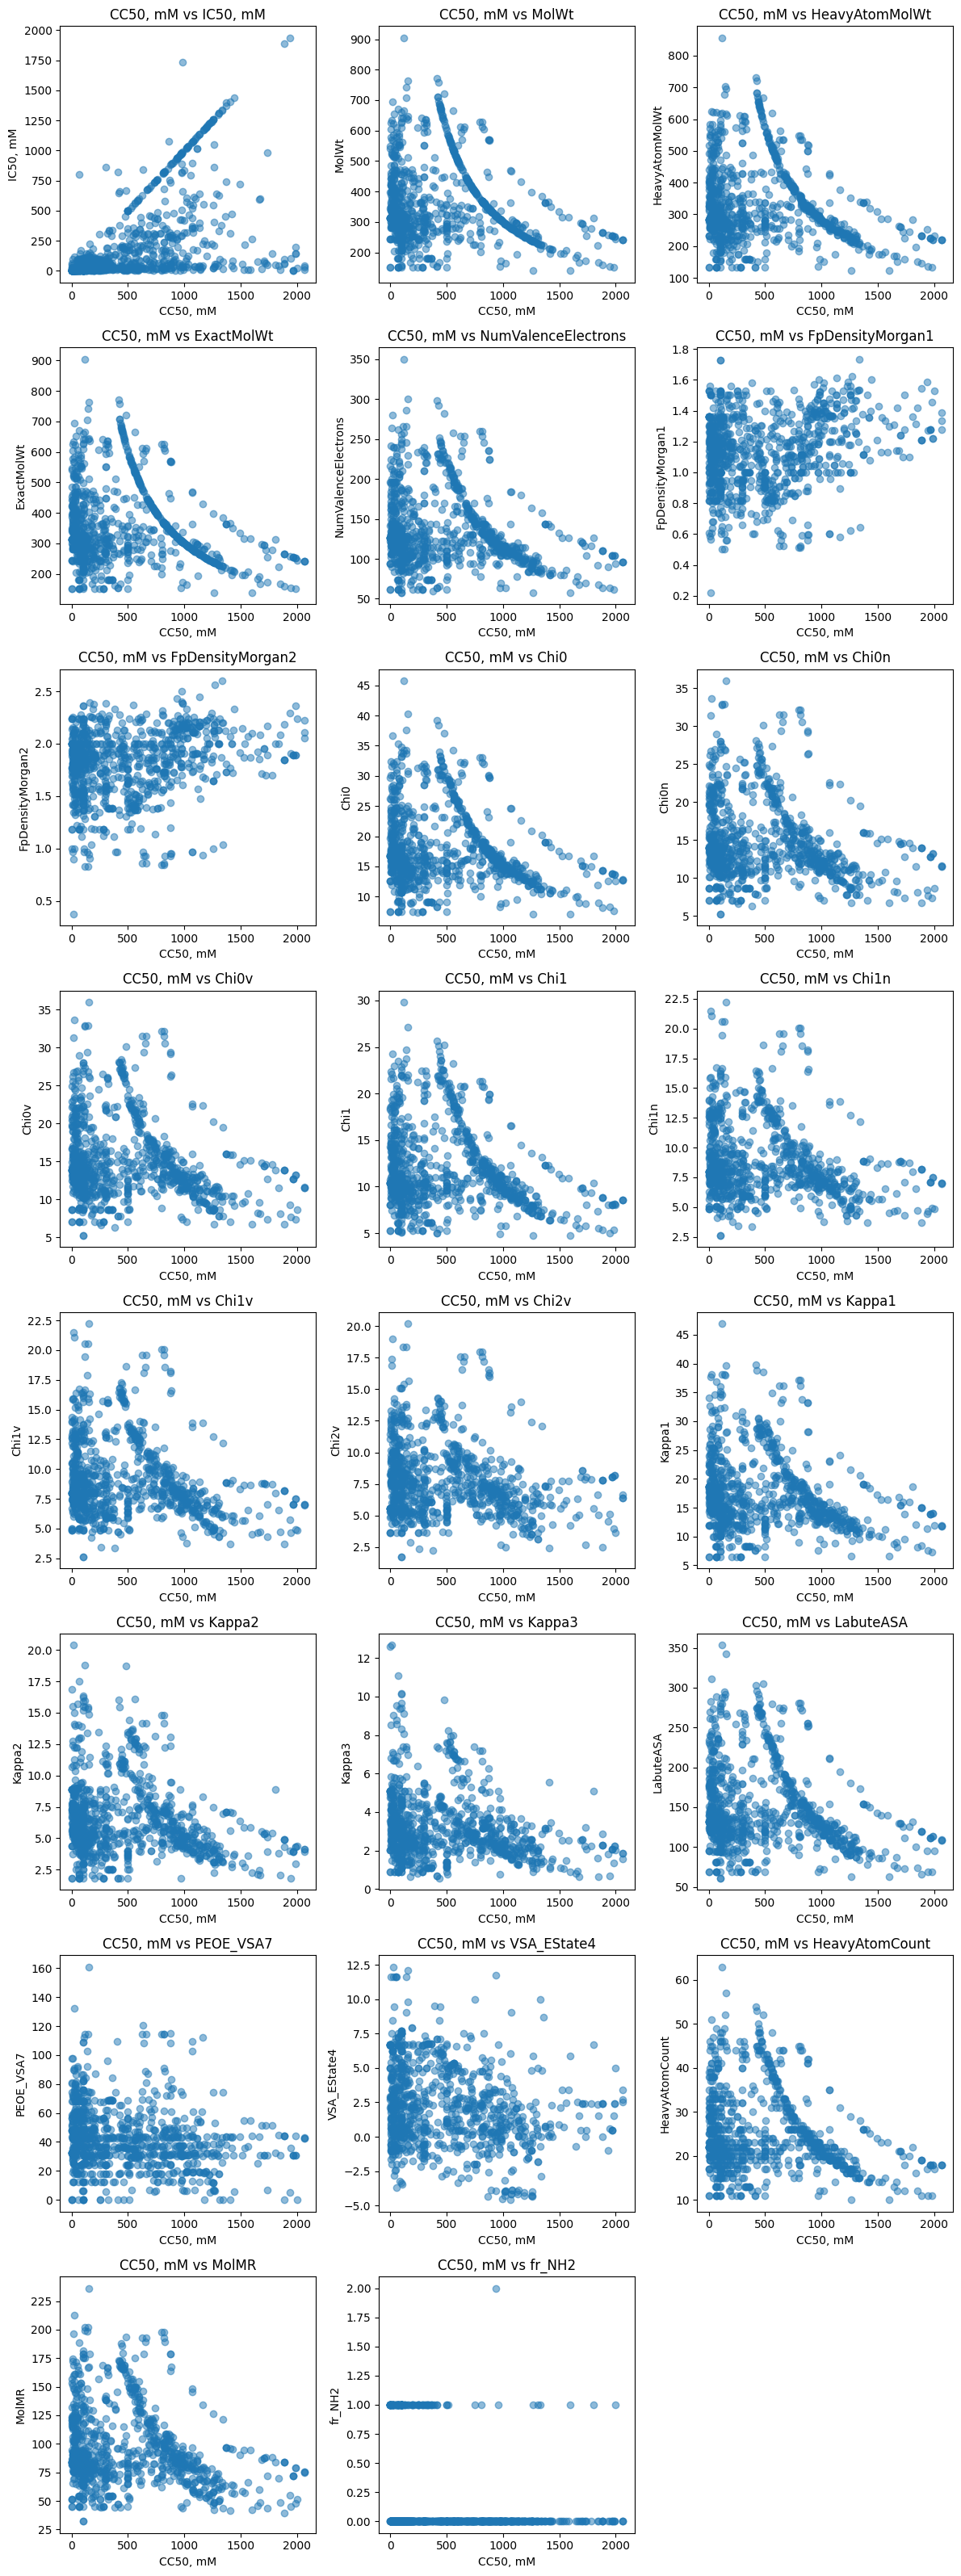

In [296]:
draw_scatterplots_for_correlations(df_cc50, target_column, cc50_corr_map)

Признак СС50 коррелирует с такими прзнаками как (описаны не представленные ранее):

*Молекулярная масса и атомные характеристики*

**MolWt (Molecular Weight)**

Молекулярная масса соединения
Базовый дескриптор размера молекулы
Влияет на биодоступность
Коррелирует с проницаемостью через мембраны

**HeavyAtomMolWt**

Молекулярная масса тяжелых атомов (исключая водород)
Более точно отражает "эффективную массу"
Важна для объемных взаимодействий с белками

**ExactMolWt**

Точная молекулярная масса (с учетом изотопов)
Используется в масс-спектрометрии
Критична для аналитического контроля

**NumValenceElectrons**

Общее количество валентных электронов
Характеризует электронную плотность молекулы
Влияет на поляризуемость и взаимодействия


---


*Дескрипторы плотности отпечатков (Fingerprint Density)*

**FpDensityMorgan1, FpDensityMorgan2**

Плотность молекулярных отпечатков Morgan радиуса 1 и 2
Отражает структурное разнообразие в окрестности атомов
Morgan1: ближайшие соседи
Morgan2: соседи второго порядка
Характеризуют топологическую сложность

---

*Chi-индексы нулевого порядка*

**Chi0** - Simple connectivity index порядка 0

Самый базовый индекс связности
Характеризует общую связность без учета путей
Связан с размером молекулы

**Chi0n** - Simple path connectivity порядка 0

Нормализованная версия Chi0
Учитывает только топологическую структуру

**Chi0v** - Valence connectivity index порядка 0

Взвешенная по валентности версия
Учитывает электронные свойства атомов
Чувствительна к гетероатомам

---

*Каппа-дескрипторы (Kappa Shape Indices)*

**Kappa1** - First-order kappa shape index

Характеризует степень разветвления молекулы
Высокие значения → линейные молекулы
Низкие значения → сферические/разветвленные

**Kappa2** - Second-order kappa shape index

Описывает промежуточную форму молекулы
Различает разветвленные vs циклические структуры

**Kappa3** - Third-order kappa shape index

Характеризует общую молекулярную форму
Наиболее чувствителен к глобальной архитектуре


---


*Поверхностные дескрипторы*

**LabuteASA (Labute Accessible Surface Area)**

Доступная поверхность по методу Labute
Аппроксимация молекулярной поверхности через 2D-структуру
Коррелирует с растворимостью


---


*Атомные счетчики*

**HeavyAtomCount**

Количество тяжелых атомов
Основной дескриптор размера молекулы
Влияет на сложность синтеза

---

*Физико-химические свойства*

**MolMR** (Molar Refractivity)

Молярная рефракция
Мера поляризуемости и объема молекулы
Связана с дисперсионными взаимодействиями

---

*Функциональные группы*

**fr_NH2**

Количество первичных аминогрупп (-NH₂)
Характеризует основность молекулы
Способность к водородным связям (донор и акцептор)
Влияет на растворимость в воде и проницаемость

---

При этом мы видим, что значимое количество признаком имеют сильную кореляцию друг с другом.

# Анализ SI

In [297]:
target_column = 'SI'
df[target_column].describe()

,SI
count,998.000000
mean,72.650005
std,685.504279
min,0.011489
25%,1.457233
50%,3.856410
75%,16.525000
max,15620.600000


Мы знаем, что SI представляет собой отношение CC50 / IC50. При этом ранее мы выявили выбросы как для СС50, так и для IC50. Сооотвественно такие записи необходимо исключить при EDA SI.Таким образом мы исключили 42 записи.

In [298]:
df_si = df[df['IC50, mM']<=1550]
df_si = df_si[df_si['CC50, mM']<=upper_bound]

df_si['SI'].describe()

,SI
count,956.000000
mean,72.132600
std,699.829004
min,0.011489
25%,1.427262
50%,3.629536
75%,14.555643
max,15620.600000


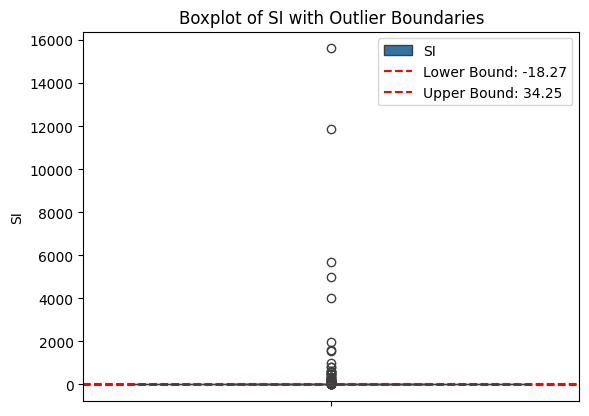

In [299]:
Q1 = df_si[target_column].quantile(0.25)
Q3 = df_si[target_column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

sns.boxplot(df_si[target_column], label=target_column)

plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axhline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

plt.title(f'Boxplot of {target_column} with Outlier Boundaries')
plt.legend()

plt.show()

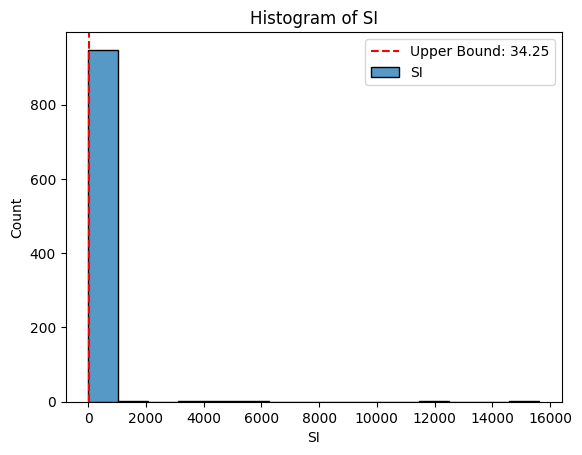

In [300]:
sns.histplot(df_si[target_column], label=target_column, bins= 15)

plt.title(f'Histogram of {target_column}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.legend()

In [301]:
count_higher_than_upper_bound = df[df[target_column]>upper_bound].shape[0]
print(f"Количество значений выше верхней границы: {count_higher_than_upper_bound}. %: {count_higher_than_upper_bound/df.shape[0]*100}")

Количество значений выше верхней границы: 140. %: 14.02805611222445


На представленых графиках мы видим выбросы. Обычно SI > 2 это хорошо, но у нас значения > 34.25 (max 15620.6), что указывает на выбросы. Стоит отметить, что это существенная часть датасета. Соответственно удаление такого кол-ва значений из датасета может негативно сказаться на предсказательной силе моделей.

порог:  0.2
Коэффициент корреляции между SI и IC50, mM: -0.378204293062784
Коэффициент корреляции между SI и fr_Imine: 0.2353267774166921


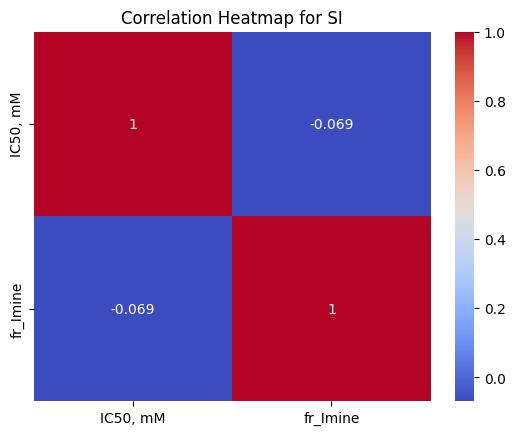

In [302]:
df_si = df_si[df_si[target_column]<=upper_bound]
si_corr_map = corr_analyz(df_si, target_column, 0.2)

df_si_corr = df_si[list(si_corr_map.keys())]

sns.heatmap(df_si_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for SI')
plt.show()

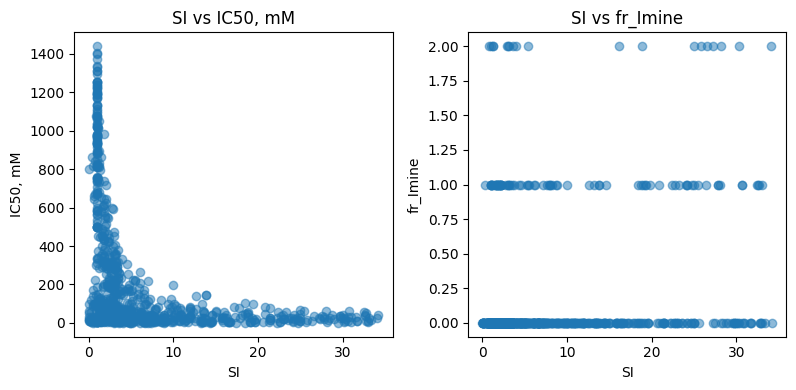

In [303]:
draw_scatterplots_for_correlations(df_si, target_column, si_corr_map)

Корреляционный анализ показывает, что сколь либо значимую корреляцию признак SI имеет только с IC50 и fr_Imine

**fr_Imine** - это дескриптор, подсчитывающий количество иминных групп в молекуле

Указывает на:

Потенциал ковалентного связывания

Реакционную способность молекулы

Метаболическую лабильность

Необходимость дополнительной оценки безопасности